<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('states_edu.csv')

Chosen test: **<Math for 8 grade>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
# rename the columns
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

Print out the names of the columns.

In [4]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

Firstly, let's focus math score for 8 grade. So we need to remove all the NaN data in this column.

In [5]:
df_math = df[ ~df['AVG_MATH_8_SCORE'].isna()]

Although we remove the NAN rows for AVG_MATH_8_SCORE, some variables (revenue and expenditure) that we are interested in are still NANs. 

In [6]:
df_math.notna().sum()

PRIMARY_KEY                     602
STATE                           602
YEAR                            602
ENROLL_ALL_EST                  397
TOTAL_REVENUE                   439
FEDERAL_REVENUE                 439
STATE_REVENUE                   439
LOCAL_REVENUE                   439
TOTAL_EXPENDITURE               439
INSTRUCTION_EXPENDITURE         439
SUPPORT_SERVICES_EXPENDITURE    439
OTHER_EXPENDITURE               397
CAPITAL_OUTLAY_EXPENDITURE      439
ENROLL_PREK                     518
ENROLL_KINDER                   528
ENROLL_4                        528
ENROLL_8                        528
ENROLL_12                       528
ENROLL_PRIMARY                  397
ENROLL_HS                       448
ENROLL_ALL                      528
AVG_MATH_4_SCORE                564
AVG_MATH_8_SCORE                602
AVG_READING_4_SCORE             521
AVG_READING_8_SCORE             478
dtype: int64

Let's look at the dataframe after the cleaning NANs of AVG_MATH_8_SCORE. For better reviewing the data, we sort it by states and years.

In [7]:
df_new = df_math.sort_values( by = ['STATE', 'YEAR']).reset_index(drop = True)

In [8]:
df_new.head(12)

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1990_ALABAMA,ALABAMA,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58666.0,57024.0,42031.0,NaN,NaN,721806.0,NaN,253.0,NaN,NaN
1,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,739992.0,217.0,264.0,NaN,NaN
3,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
4,2005_ALABAMA,ALABAMA,2005,729342.0,5889966.0,665924.0,3247562.0,1976480.0,5904664.0,3053380.0,...,55919.0,59643.0,43452.0,466164.0,212414.0,741761.0,225.0,262.0,208.0,252.0
5,2007_ALABAMA,ALABAMA,2007,743273.0,7069040.0,689072.0,4070949.0,2309019.0,7196459.0,3653466.0,...,57795.0,58792.0,46200.0,466414.0,216941.0,742919.0,229.0,266.0,216.0,252.0
6,2009_ALABAMA,ALABAMA,2009,745668.0,7186390.0,728795.0,4161103.0,2296492.0,7815467.0,3836398.0,...,59512.0,57027.0,48164.0,464601.0,219495.0,748889.0,228.0,269.0,216.0,255.0
7,2011_ALABAMA,ALABAMA,2011,746933.0,7376725.0,1077070.0,3965614.0,2334041.0,7411768.0,3844055.0,...,56491.0,57919.0,49510.0,461122.0,217615.0,744621.0,231.0,269.0,220.0,258.0
8,2013_ALABAMA,ALABAMA,2013,744548.0,7197439.0,811739.0,3898347.0,2487353.0,7487741.0,3747993.0,...,55719.0,58799.0,48965.0,458327.0,218705.0,746204.0,233.0,269.0,219.0,257.0
9,2015_ALABAMA,ALABAMA,2015,734974.0,7360222.0,795238.0,4080167.0,2484817.0,7501799.0,3817479.0,...,55808.0,55792.0,50668.0,452764.0,222182.0,743789.0,231.0,267.0,217.0,259.0


We can see that some states missed some data on expenditures.

<h2> Feature Selection </h2>

_Use this space to modify or create features_

Two columns SUPPORT_SERVICES_EXPENDITURE and INSTRUCTION_EXPENDITURE_PER_STUDENT are added since I want to analyze how the spending on each student impact their math score.

In [9]:
df_new.loc[:, 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df_new['SUPPORT_SERVICES_EXPENDITURE'] / df_new['ENROLL_ALL']
df_new.loc[:, 'INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df_new['INSTRUCTION_EXPENDITURE'] / df_new['ENROLL_ALL']

But many values of expenditures are missing. One way to handle thses NANs is to use interpolation. By assuming that the expenditure on each student will change linearly over time, a linear method can be applied to perform the interpolation.

In [10]:
# create a function for interpolation
def do_interpolation(state, exp_type):
    """
    Perform interpolation on the series of expenditures of a state.
    
    Input:
    state: str, the name of the state
    exp_type: str, the name of the expenditure that needs to be interpolated.
    
    Output:
    inpo_s: series, the resultant series.
    """
    pos = (df_new['STATE'] == state)
    s = df_new[pos][exp_type].interpolate(method = 'linear')
    return(s)

# build a list of names of the states
states = df_new['STATE'].unique()

for state in states:
    pos = (df_new['STATE'] == state)
    for exp_type in ['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 'INSTRUCTION_EXPENDITURE_PER_STUDENT']:
        df_new.loc[pos, exp_type] = do_interpolation(state, exp_type)

After performing interpolation, we have filled 102 values for SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT and INSTRUCTION_EXPENDITURE_PER_STUDENT. 

In [11]:
df_new.notna().sum()

PRIMARY_KEY                                 602
STATE                                       602
YEAR                                        602
ENROLL_ALL_EST                              397
TOTAL_REVENUE                               439
FEDERAL_REVENUE                             439
STATE_REVENUE                               439
LOCAL_REVENUE                               439
TOTAL_EXPENDITURE                           439
INSTRUCTION_EXPENDITURE                     439
SUPPORT_SERVICES_EXPENDITURE                439
OTHER_EXPENDITURE                           397
CAPITAL_OUTLAY_EXPENDITURE                  439
ENROLL_PREK                                 518
ENROLL_KINDER                               528
ENROLL_4                                    528
ENROLL_8                                    528
ENROLL_12                                   528
ENROLL_PRIMARY                              397
ENROLL_HS                                   448
ENROLL_ALL                              

Finally, clean up the rows with NAN values in SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT and INSTRUCTION_EXPENDITURE_PER_STUDENT.

In [12]:
df_new = df_new[ ~df_new['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'].isna() ]

Final feature list: **<SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT, INSTRUCTION_EXPENDITURE_PER_STUDENT, YEAR, ENROLL_8, AVG_READING_8_SCORE, AVG_READING_4_SCORE\>**

Feature selection justification: **< In my opinion, more budget spending on the students will give them better educational materials, better equipment (computer, iPad), and more advanced teaching techniques which can help students to know difficult concepts in math. So it is interesting to see whether average expenditures play significant roles in math scores. Also, in my opinion, the states which have outstanding average 4th-grade math scores should also have high 8th-grade math \>**

<h2> EDA </h2>

Visualization 1

Firstly have a look at the distribution of average math scores for students in the 8th grade. 

Text(0.5, 1.0, 'Distribution of 8th grade math scores')

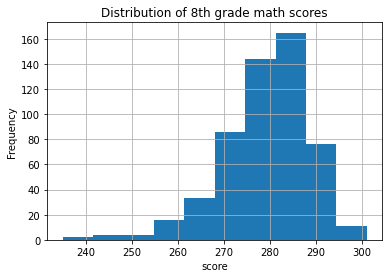

In [13]:
df_new.AVG_MATH_8_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade math scores')

It is also helpful to look at the data over time. From the graph below we can observe that the math score is improved linearly over year, but recently it has a downward trend 

Text(0.5, 1.0, '8th grade math score over time')

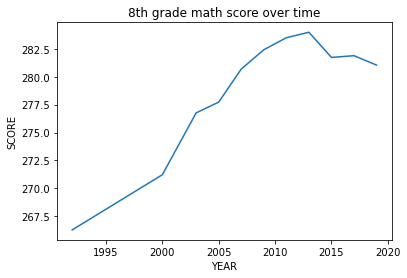

In [14]:
df_new.groupby('YEAR').AVG_MATH_8_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('8th grade math score over time')

**< From the figures above we can see that the average math score for 8th-grade students in the USA is 280. Also, the national average math score is getting better every year. But recently, there is a downward trend. >**

Visualization 2

Let's use the scatter plot to visualize the correlations between studied variables and math scores.

Text(0, 0.5, '8th grade math score')

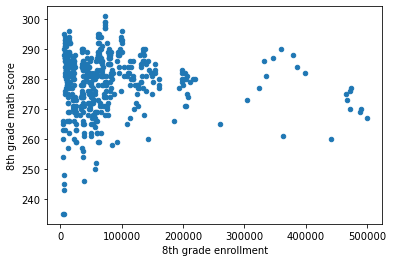

In [15]:
df_new.plot.scatter(x='ENROLL_8',y='AVG_MATH_8_SCORE')
plt.xlabel('8th grade enrollment')
plt.ylabel('8th grade math score')

It seems like the number of enrollments is not strongly correlated to the math score. But do the students with high math scores in their 4th grade should also have nice math scores in 8th grade?

Text(0, 0.5, '8th grade math score')

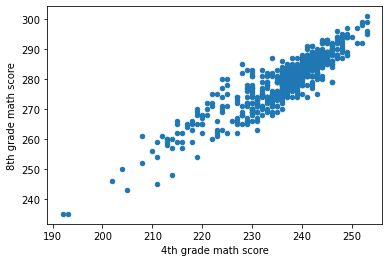

In [16]:
df_new.plot.scatter(x='AVG_MATH_4_SCORE',y='AVG_MATH_8_SCORE')
plt.xlabel('4th grade math score')
plt.ylabel('8th grade math score')

Finally, it is time to check the correlation between average expenditure and math scores.

Text(0, 0.5, '8th grade math score')

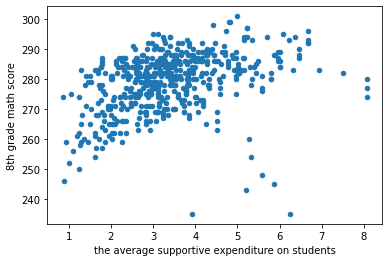

In [17]:
df_new.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('the average supportive expenditure on students')
plt.ylabel('8th grade math score')

Text(0, 0.5, '8th grade math score')

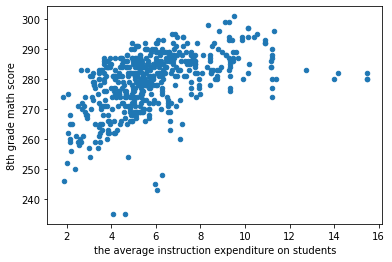

In [18]:
df_new.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('the average instruction expenditure on students')
plt.ylabel('8th grade math score')

**< The three plots above show that the math score of 8th grade students are positively correlated to the values of math score of 4th grade students and the average expenditures.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
var_names = ['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','ENROLL_8', 'INSTRUCTION_EXPENDITURE_PER_STUDENT',\
             'YEAR', 'AVG_MATH_4_SCORE']
X = df_new[var_names].dropna()
y = df_new.loc[X.index]['AVG_MATH_8_SCORE']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **< REGRESSION >**

In [22]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [23]:
# create your model here
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Math 8 Score')

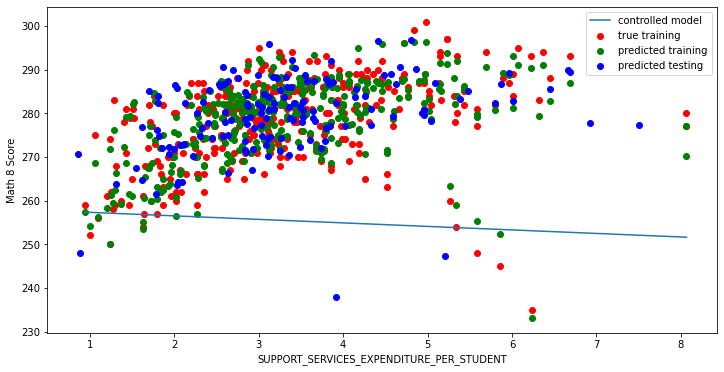

In [26]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')

Text(0, 0.5, 'Math 8 Score')

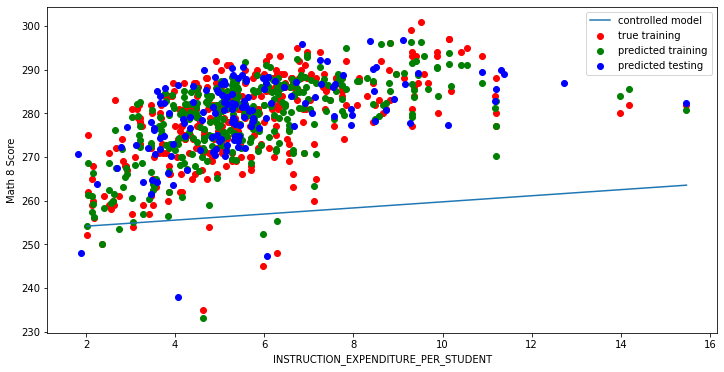

In [27]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')

Calculate the R2 value to see whether the model fits the data. The R2 value in our mode equals to 0.28 which means 28% variance around the mean can be explained by the model.  

In [28]:
model.score(X_test, y_test)

0.8786839485902499

We can also exam other kinds of errors.

In [29]:
# mean error
np.mean(model.predict(X_test)-y_test)

-0.12328520046015899

In [30]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.391079292828127

Since in this exercise we exam the impacts of expenditures and other factors on 8th-grade math scores, we need to know how they affect the math score (positive or negative impact). So the coefficients should be checked.

In [31]:
coeff = model.coef_

for i in range(5):
    print("The coefficient of {0} in the model is {1}".format(var_names[i], round(coeff[i], 5)))

The coefficient of SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT in the model is -0.80492
The coefficient of ENROLL_8 in the model is -0.0
The coefficient of INSTRUCTION_EXPENDITURE_PER_STUDENT in the model is 0.69761
The coefficient of YEAR in the model is -0.29202
The coefficient of AVG_MATH_4_SCORE in the model is 1.02798


The results of coefficients are very interesting. Firstly, it seem that the support services expenditure has negative impact on studetns. Meanwhile, the instruction expenditure affect educational result positively. Why do these two types of expenditures have completely opposite impacts on the result? Maybe the significance of each variable can tell us more.

In [32]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       AVG_MATH_8_SCORE   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     605.6
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          1.17e-205
Time:                        03:03:37   Log-Likelihood:                -1330.6
No. Observations:                 490   AIC:                             2673.
Df Residuals:                     484   BIC:                             2698.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Well, from the summary above it is clear that the impact on math score caused by average support services expenditure on students is negative but not very significant because it has a p-value > 0.2 . **In contrast to that, the instruction expenditure has a positive impact and it is significant (p < 0.05).** Also, the hypothesis that a state with a high average 4th-grade math score will also have a high math score of 8th-grade is also valid. Here the coefficient for AVG_MATH_4_SCORE is 1.05 and it is statistically significant.

<h2> Summary </h2>

**< As a summary, we can conclude that the budget does play an important role in the quality of mathematical education. The results of linear regression show that increasing the average instruction spending by a dollar will increase the average 8th-grade math score by 0.43. It is also important to know that not all types of spending work. The result of other types of expenditures shows that expenditures could also bring negative but not significant impacts on math scores. So methods such as raising teacher's salaries, spending money on designing better materials, and purchasing more books in the libraries should be emphasized. \>**